In [ ]:
#libraries
import numpy as np
import sympy as sp
import sympy.physics.mechanics as me
import matplotlib.pyplot as plt


In [ ]:
# variables 
# theta = sp.symbols('theta') # angle of the beam in respect to horizon
# L_h,m_p,g = sp.symbols ('L_h,m_p,g') # Half length, m_p is platform mass, g is gravity 
# rho_ai = sp.symbols('rho_ai') # density of aluminium 
# V_p = sp.symbols ('V_p') # volume of the platform
# A = sp.symbols('A') # cross-sectional area of the beam
# I = sp.symbols('I') # moment of inertia of the beam


def Pin_locator (theta_deg, L, pin_name=None):
   

    theta = theta_deg * np.pi / 180  # Convert degrees to radians
    x = L*np.cos(theta)
    y = L*np.sin(theta)
    L_h=L/2
    x_h = L_h*np.cos(theta)
    y_h = L_h*np.sin(theta)

    H = np.array([0, L]).astype(float)  
    A = H + np.array([0, -y]).astype(float)  
    P1 = H + np.array([x_h, -y_h]).astype(float)  
    B = A + np.array([x, y]).astype(float)  
    C = H + np.array([x, -y]).astype(float)  
    P2 = B + np.array([x_h, -y_h]).astype(float)  
    E = B + np.array([x, -y]).astype(float)  
    D = C + np.array([x, y]).astype(float)  
    P3 = E + np.array([x_h, y_h]).astype(float)  
    F = E + np.array([x, y]).astype(float)  
    G = D + np.array([x, -y]).astype(float)  
    
    # Dictionary of all pins
    pins_dict = {'H': H, 'A': A, 'P1': P1, 'B': B, 'C': C, 'P2': P2, 
                 'E': E, 'D': D, 'P3': P3, 'F': F, 'G': G}
    
    if pin_name is None:
        return H, A, P1, B, C, P2, E, D, P3, F, G
    else:
        if pin_name not in pins_dict:
            raise ValueError(f"Pin '{pin_name}' not found. Available pins: {list(pins_dict.keys())}")
        return pins_dict[pin_name]




#Pin vectorial definition 
# H = sp.Matrix([0,L])
# A = H+sp.Matrix([0,-y])
# P1 =H+ sp.Matrix([x_h,-y_h])
# B = A+sp.Matrix([x,y])
# C = H+sp.Matrix ([x,-y])
# P2 = B+ sp.Matrix([x_h,-y_h])
# E = B + sp.Matrix([x,-y])
# D = C + sp.Matrix([x,y])
# P3 = E + sp.Matrix([x_h,y_h])
# F = E + sp.Matrix([x,y])
# G = D +sp.Matrix([x,-y])



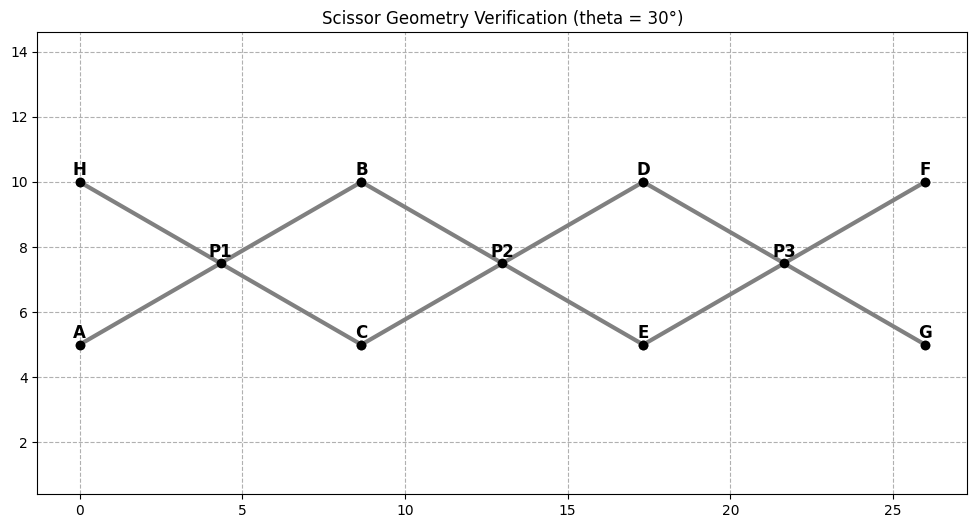

In [ ]:
#plotting 

def plot_scissor (theta_deg, L_const=10, L_bar=10):
    theta = np.radians(theta_deg)
    
    # Deriving your variables from a single angle theta
    # x and y are the full span of one 'X'
    x = L_bar * np.cos(theta)
    y = L_bar * np.sin(theta)
    # x_h and y_h are the half-spans (to the pivot P)
    x_h, y_h = x/2, y/2

    # Your Matrix Definitions
    H = np.array([0, L_const])
    A = H + np.array([0, -y])
    P1 = H + np.array([x_h, -y_h])
    B = A + np.array([x, y])
    C = H + np.array([x, -y])
    P2 = B + np.array([x_h, -y_h])
    E = B + np.array([x, -y])
    D = C + np.array([x, y])
    P3 = E + np.array([x_h, y_h])
    F = E + np.array([x, y])
    G = D + np.array([x, -y])

    # H = np.array([0, L_const]).astype(float)
    # A = H + np.array([0, -y]).astype(float)
    # P1 = H + np.array([x_h, -y_h]).astype(float)
    # B = A + np.array([x, y]).astype(float)
    # C = H + np.array([x, -y]).astype(float)
    # P2 = B + np.array([x_h, -y_h]).astype(float)
    # E = B + np.array([x, -y]).astype(float)
    # D = C + np.array([x, y]).astype(float)
    # P3 = E + np.array([x_h, y_h]).astype(float)
    # F = E + np.array([x, y]).astype(float)
    # G = D + np.array([x, -y]).astype(float)

    # Define Bars for plotting
    bars = [
        (H, C), (A, B), # Stage 1
        (B, E), (C, D), # Stage 2
        (D, G), (E, F)  # Stage 3
    ]
    
    plt.figure(figsize=(12, 6))
    for p1, p2 in bars:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'o-', color='gray', linewidth=3)
    
    # Label Points
    points = {'H':H, 'A':A, 'P1':P1, 'B':B, 'C':C, 'P2':P2, 'D':D, 'E':E, 'P3':P3, 'F':F, 'G':G}
    for name, pt in points.items():
        plt.text(pt[0], pt[1] + 0.2, name, fontsize=12, fontweight='bold', ha='center')
        plt.plot(pt[0], pt[1], 'ko') # Pin markers

    plt.title(f"Scissor Geometry Verification (theta = {theta_deg}°)")
    plt.grid(True, linestyle='--')
    plt.axis('equal')
    plt.show()

plot_scissor(30)

In [ ]:
##  *** First Method ***
# # R_Dx, R_Dy = Reaction at Pin D
# # R_P3x, R_P3y = Reaction at Pin P3
# def Force_D(F_G, theta_deg, L,):
 
#     # Get pin D position
#     D = Pin_locator(theta_deg, L, pin_name='D')
#     G = Pin_locator(theta_deg, L, pin_name='G')
#     P3 = Pin_locator(theta_deg, L, pin_name='P3')
    
#     RDx, RDy, RP3x, RP3y = sp.symbols('R_Dx R_Dy R_P3x R_P3y')
#     F_G = sp.symbols('F_G') # The force you apply at G
    


#     sol = sp.solve([sum_F[0], sum_F[1], sum_M], [RDx, RDy, RP3x, RP3y])
#     return sol

# # Test the function
# Test = Pin_locator(55, 0.45, pin_name='D')
# Test_FD = Force_D(30,55,0.45)
# print(Test)
# print(Test_FD)

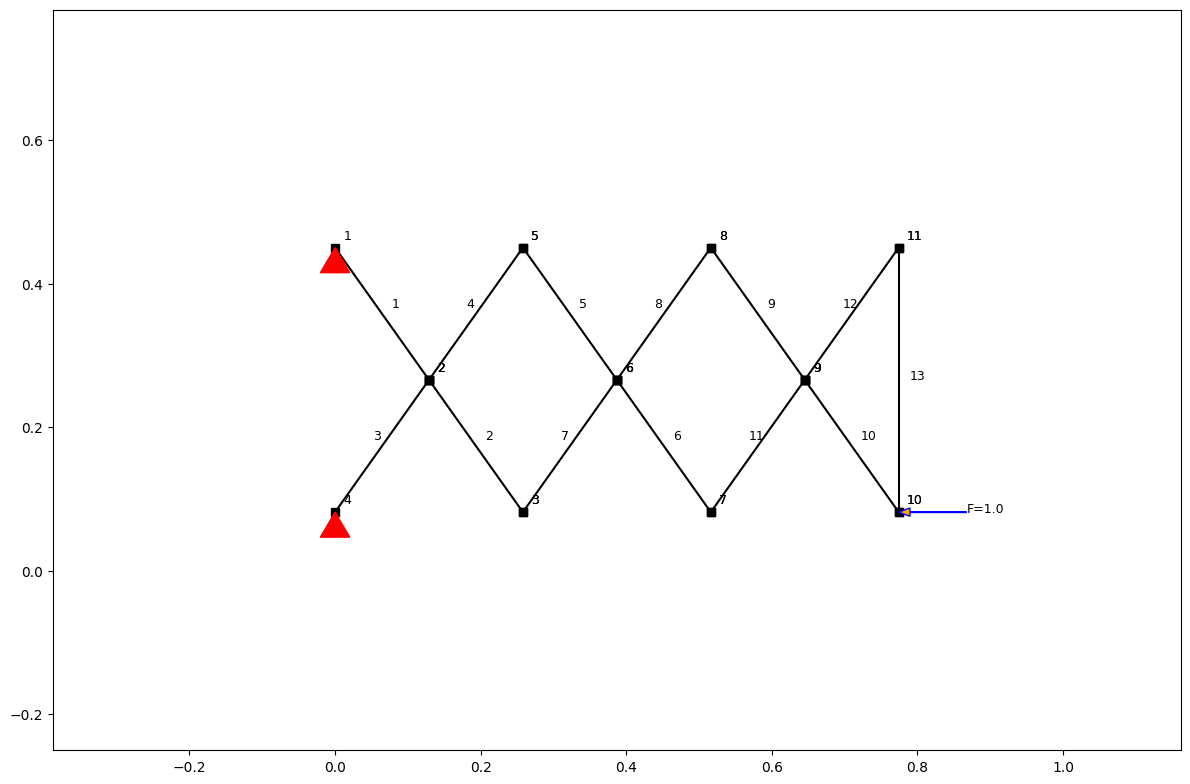

ValueError: need at least one array to concatenate

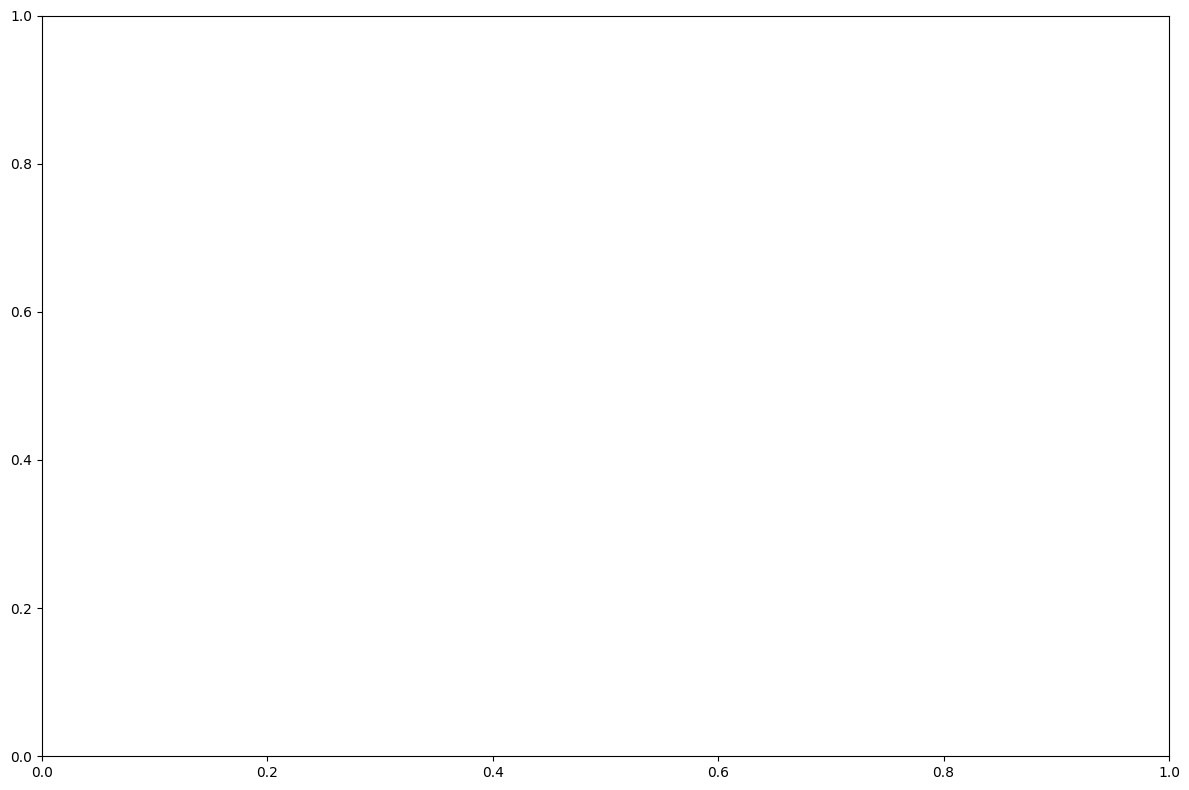

In [ ]:
from anastruct import SystemElements


#material PX
E_al = 70e9        # Young's Modulus (Pascals: N/m^2)
rho_al = 2710      # Density (kg/m^3)
A_cs= 0.5*0.5  # Cross-sectional area in m^2
ss = SystemElements()
element_type = 'truss'  # Using bar elements for the scissor structure

def truss_forces (theta_deg,L,A_cs,E_al,Px,load_at):
    ss = SystemElements(EA=float(E_al*A_cs)) 
    pin_names = ['H', 'A', 'P1', 'B', 'C', 'P2', 'E', 'D', 'P3', 'F', 'G']
    coords = {name: Pin_locator(theta_deg, L, pin_name=name) for name in pin_names}
    # 3. Define Connectivity (Split at pivots P1, P2, P3)
    elements = [
        ('H', 'P1'), ('P1', 'C'), ('A', 'P1'), ('P1', 'B'), # Stage 1
        ('B', 'P2'), ('P2', 'E'), ('C', 'P2'), ('P2', 'D'), # Stage 2
        ('D', 'P3'), ('P3', 'G'), ('E', 'P3'), ('P3', 'F'), # Stage 3
        ('F', 'G')                                         # Vertical link
    ]# 3. Define Connectivity (Split at pivots P1, P2, P3)
    elements = [
        ('H', 'P1'), ('P1', 'C'), ('A', 'P1'), ('P1', 'B'), # Stage 1
        ('B', 'P2'), ('P2', 'E'), ('C', 'P2'), ('P2', 'D'), # Stage 2
        ('D', 'P3'), ('P3', 'G'), ('E', 'P3'), ('P3', 'F'), # Stage 3
        ('F', 'G')                                         # Vertical link
    ]

    for n1,n2 in elements:
        ss.add_element(location=[coords[n1], coords[n2]]) #add hinges
    
    id_H = ss.find_node_id(coords['H'])
    id_A = ss.find_node_id(coords['A'])

    ss.add_support_hinged(node_id=id_H) # Add hinged support at H
    ss.add_support_hinged(node_id=id_A) # Add roller support at A (direction = 1 means horizontal)

    id_load = ss.find_node_id(coords[load_at])
    ss.point_load(node_id=id_load, Fx=Px)
    # Solve the system
    ss.solve()
        

            
    return ss

# Run and Show
system = truss_forces(55, 0.45, A_cs, E_al,-1, 'G')  
system.show_structure()
ss.show_axial_force()
ss.show_resultant_force()



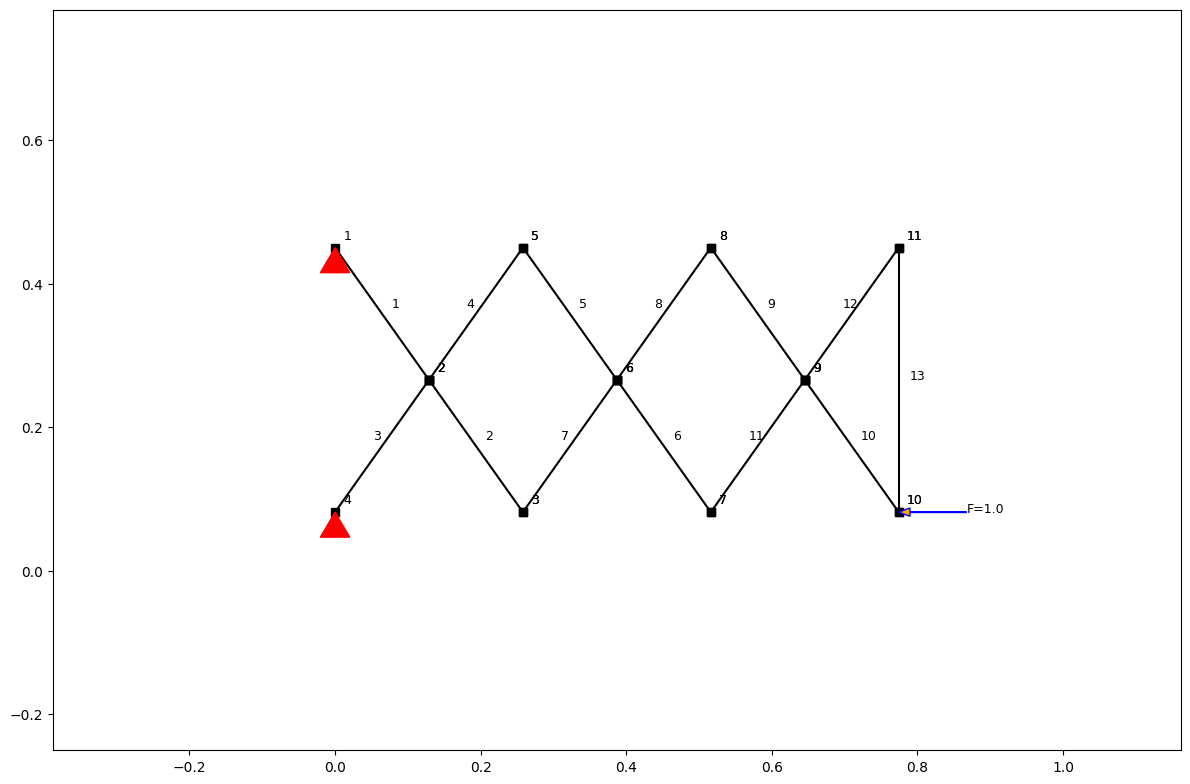

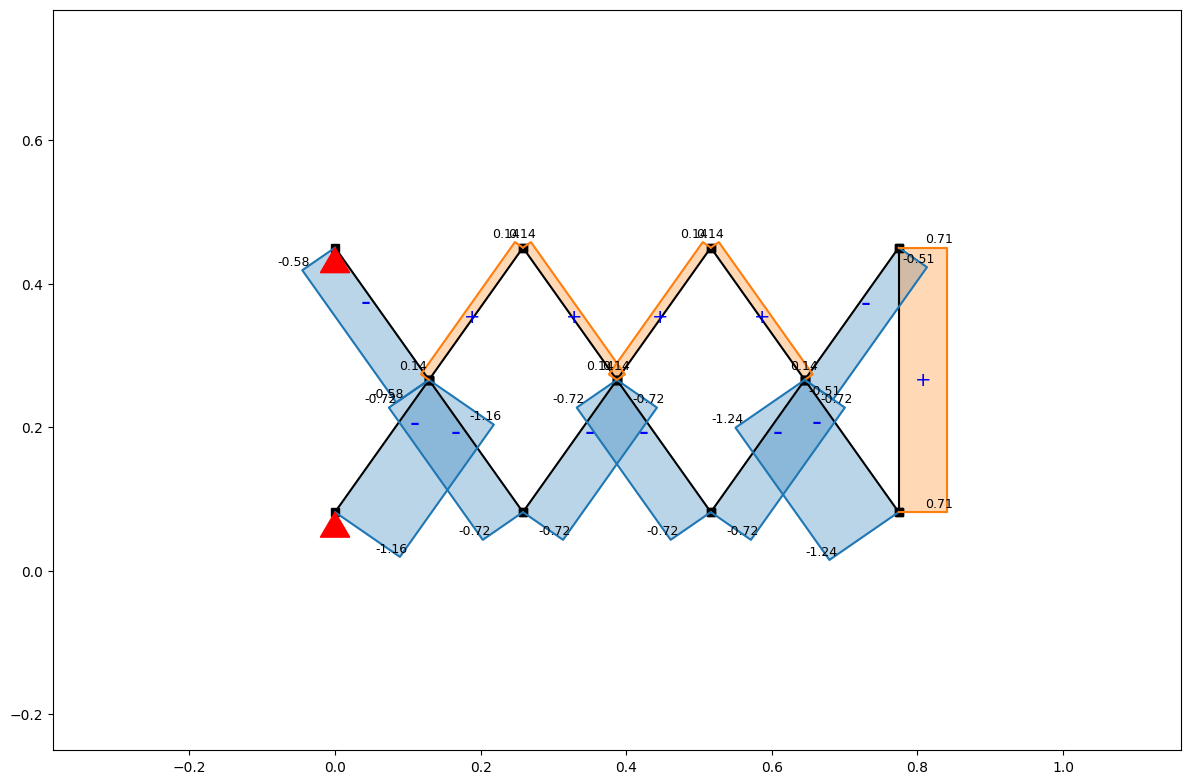

In [ ]:
from anastruct import SystemElements


#material PX
E_al = 70e9        # Young's Modulus (Pascals: N/m^2)
rho_al = 2710      # Density (kg/m^3)
A_cs= 0.5*0.5  # Cross-sectional area in m^2
ss = SystemElements()
element_type = 'truss'  # Using bar elements for the scissor structure

def truss_forces (theta_deg,L,A_cs,E_al,Px,load_at):
    ss = SystemElements(EA=float(E_al*A_cs)) 
    pin_names = ['H', 'A', 'P1', 'B', 'C', 'P2', 'E', 'D', 'P3', 'F', 'G']
    coords = {name: Pin_locator(theta_deg, L, pin_name=name) for name in pin_names}
    # 3. Define Connectivity (Split at pivots P1, P2, P3)
    elements = [
        ('H', 'P1'), ('P1', 'C'), ('A', 'P1'), ('P1', 'B'), # Stage 1
        ('B', 'P2'), ('P2', 'E'), ('C', 'P2'), ('P2', 'D'), # Stage 2
        ('D', 'P3'), ('P3', 'G'), ('E', 'P3'), ('P3', 'F'), # Stage 3
        ('F', 'G')                                         # Vertical link
    ]# 3. Define Connectivity (Split at pivots P1, P2, P3)
    elements = [
        ('H', 'P1'), ('P1', 'C'), ('A', 'P1'), ('P1', 'B'), # Stage 1
        ('B', 'P2'), ('P2', 'E'), ('C', 'P2'), ('P2', 'D'), # Stage 2
        ('D', 'P3'), ('P3', 'G'), ('E', 'P3'), ('P3', 'F'), # Stage 3
        ('F', 'G')                                         # Vertical link
    ]

    for n1,n2 in elements:
        ss.add_element(location=[coords[n1], coords[n2]]) #add hinges
    
    id_H = ss.find_node_id(coords['H'])
    id_A = ss.find_node_id(coords['A'])

    ss.add_support_hinged(node_id=id_H) # Add hinged support at H
    ss.add_support_hinged(node_id=id_A) # Add roller support at A (direction = 1 means horizontal)

    id_load = ss.find_node_id(coords[load_at])
    ss.point_load(node_id=id_load, Fx=Px)
    # Solve the system
    ss.solve()
        

            
    return ss

# Run and Show
system = truss_forces(55, 0.45, A_cs, E_al,-1, 'G')  
system.show_structure()
system.show_axial_force()